In [68]:
import tensorflow.keras as keras
import tensorflow as tf
from os import pipe
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [69]:
# Carregando os dados Mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [70]:
# Listando dados do dataset
y_train_onehot = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes = 10)

# imprime os 5 primeiros valores para exemplificar a codificacao
print("### Antes ###")
print(y_train[:5])
print(y_test[:5])

#print("\n### Depois ###")
#print(x_test[:5])
#print(y_test[:5])


print("\n### Depois Shape ###")
print(x_test.shape)
print(y_test.shape)

### Antes ###
[5 0 4 1 9]
[7 2 1 0 4]

### Depois Shape ###
(10000, 28, 28)
(10000,)


In [71]:
# Normalizar os dados
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplanar as imagens de 28x28 para 784
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

In [66]:
# Criar o modelo
#model = models.Sequential()
#model.add(layers.Flatten(input_shape=(28, 28)))  # A camada de flatten
#model.add(layers.Dense(100, activation='relu'))   # Camada oculta
#model.add(layers.Dense(10, activation='softmax'))  # Camada de saída para 10 classes
#model.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])

In [72]:
# Criar o modelo Regulador Dropout
model2 = models.Sequential()

model2.add(layers.Flatten(input_shape=(28, 28)))  # A camada de flatten

model2.add(layers.Dense(units=128, activation='relu', trainable=True))   # Camada oculta
model2.add(Dropout(0.2))

model2.add(layers.Dense(units=128, activation='relu', trainable=True))   # Camada oculta
model2.add(Dropout(0.2))

model2.add(layers.Dense(units=128, activation='relu', trainable=True))   # Camada oculta
model2.add(Dropout(0.2))

model2.pop(layers.Dense(units=128, activation='relu', trainable=False))   # Camada oculta
model2.pop(Dropout(0.2))

model2.add(layers.Dense(10, activation='softmax'))  # Camada de saída para 10 classes

model2.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])


In [73]:
model2

<Sequential name=sequential_8, built=True>

In [62]:
#model=create_model()
#from tensorflow.keras.utils import plot_model

#plot_model(
#    model,
#    show_shapes=True,
#    show_layer_names=True,
#    rankdir="LR",
#    expand_nested=True,
#    dpi=96
#)

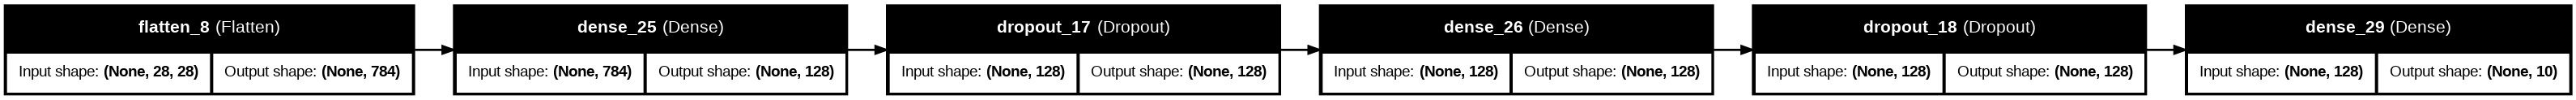

In [74]:
#model=create_model()
from tensorflow.keras.utils import plot_model

plot_model(
    model2,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

In [75]:
#model.summary()
model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
#history = model.fit(X_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)
history = model2.fit(x_train, y_train_onehot, validation_split=.1, epochs=100, verbose=2)

Epoch 1/100
1688/1688 - 7s - 4ms/step - categorical_accuracy: 0.9031 - loss: 0.3253 - val_categorical_accuracy: 0.9595 - val_loss: 0.1367
Epoch 2/100
1688/1688 - 3s - 2ms/step - categorical_accuracy: 0.9533 - loss: 0.1529 - val_categorical_accuracy: 0.9733 - val_loss: 0.0862
Epoch 3/100
1688/1688 - 5s - 3ms/step - categorical_accuracy: 0.9634 - loss: 0.1175 - val_categorical_accuracy: 0.9767 - val_loss: 0.0800
Epoch 4/100
1688/1688 - 4s - 2ms/step - categorical_accuracy: 0.9684 - loss: 0.1003 - val_categorical_accuracy: 0.9772 - val_loss: 0.0739
Epoch 5/100
1688/1688 - 3s - 2ms/step - categorical_accuracy: 0.9719 - loss: 0.0870 - val_categorical_accuracy: 0.9788 - val_loss: 0.0775
Epoch 6/100
1688/1688 - 5s - 3ms/step - categorical_accuracy: 0.9742 - loss: 0.0793 - val_categorical_accuracy: 0.9818 - val_loss: 0.0718
Epoch 7/100
1688/1688 - 3s - 2ms/step - categorical_accuracy: 0.9778 - loss: 0.0716 - val_categorical_accuracy: 0.9808 - val_loss: 0.0678
Epoch 8/100
1688/1688 - 5s - 3ms/s

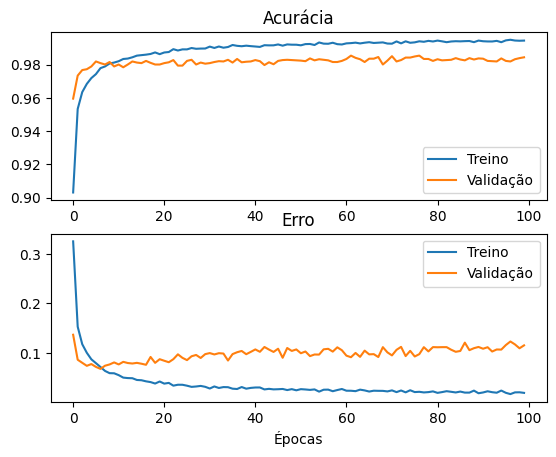

In [77]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)

#  "Accuracy"
axes[0].plot(history.history['categorical_accuracy'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_categorical_accuracy'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

In [78]:
#Calculando classes preditas para os valores de teste
#y_pred = model.predict(x_test)
#print(y_pred)

y_pred = model2.predict(x_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[1.5933384e-23 2.6376605e-19 3.0096328e-15 ... 1.0000000e+00
  1.6621916e-22 2.1452825e-15]
 [5.6371636e-31 1.9403454e-20 1.0000000e+00 ... 4.1415330e-23
  4.1461679e-29 9.1793587e-37]
 [1.5977128e-14 1.0000000e+00 5.4002195e-11 ... 1.1208889e-12
  1.9273402e-12 1.2430856e-10]
 ...
 [2.3802148e-31 6.2422698e-24 8.0810165e-26 ... 2.2454587e-16
  1.2020780e-22 1.4067981e-15]
 [9.2711563e-33 0.0000000e+00 1.0649868e-43 ... 0.0000000e+00
  7.4993500e-30 2.2140516e-43]
 [5.4673844e-35 3.8393762e-38 1.2986928e-34 ... 0.0000000e+00
  3.2717567e-27 3.8017227e-42]]


In [79]:
# Comparando os valores preditos com os reais
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [7 2 1 ... 4 5 6]
Classes preditas:	 [7 2 1 ... 4 5 6]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_onehot)
print(cm)

[[ 971    1    0    0    0    1    4    1    2    0]
 [   1 1125    3    1    0    1    1    2    1    0]
 [   4    0 1017    1    1    0    2    6    0    1]
 [   0    0    6  988    0    6    0    4    1    5]
 [   0    0    4    0  955    0    2    5    2   14]
 [   2    0    0    7    1  877    2    1    1    1]
 [   4    2    1    1    2    7  940    0    1    0]
 [   2    1    7    3    1    0    0 1012    0    2]
 [   4    0    3    4    3    8    0    6  943    3]
 [   0    2    0    2   11    3    1    4    0  986]]


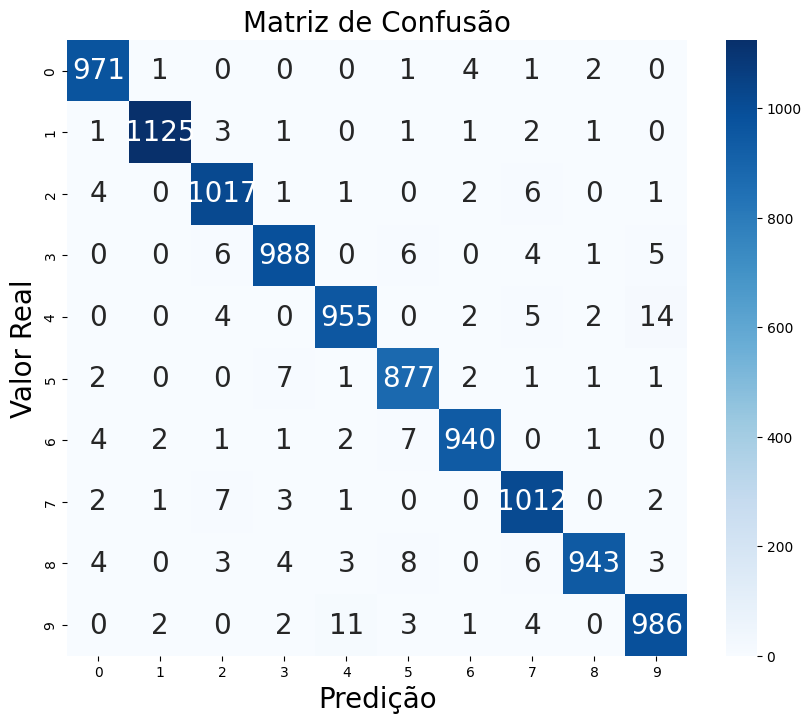

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()